A local school district has a goal to reach a 95% graduation rate by the end of the 
decade by identifying students who need intervention before they drop out of 
school. As a software engineer contacted by the school district, your task is to 
model the factors that predict how likely a student is to pass their high school final 
exam, by constructing an intervention system that leverages supervised learning 
techniques. The board of supervisors has asked that you find the most effective 
model that uses the least amount of computation costs to save on the budget. You 
will need to analyze the dataset on students' performance and develop a model 
that will predict a given student will pass, quantifying whether an intervention is 
necessary

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading data

In [2]:
data = data = pd.read_csv(r'D:\Devi\ICT_TVM\ASSIGNMENTS\student-data.csv')

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


### Basic data analysis

In [4]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

<AxesSubplot:>

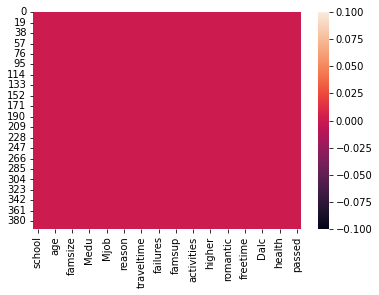

In [9]:
sns.heatmap(data.isna())

There is no null values in the dataset

In [6]:
data.shape

(395, 31)

In [7]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [7]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object

In [8]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


<AxesSubplot:xlabel='sex', ylabel='count'>

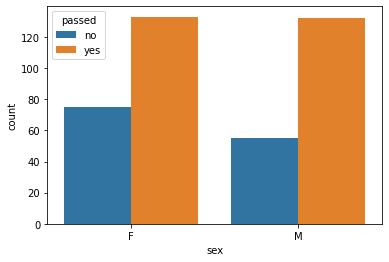

In [11]:
sns.countplot(data= new_data, x='sex', hue= 'passed')

<AxesSubplot:xlabel='sex', ylabel='absences'>

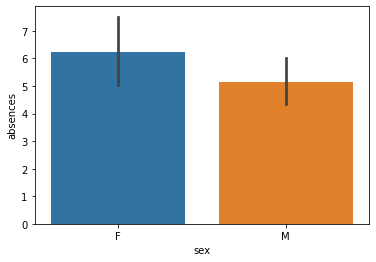

In [13]:
sns.barplot(data= new_data, x='sex', y= 'absences')

<AxesSubplot:xlabel='Mjob', ylabel='count'>

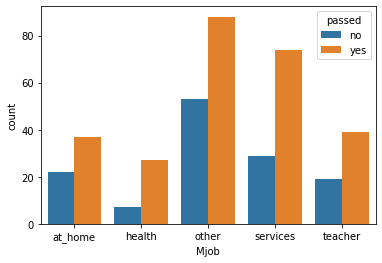

In [41]:
sns.countplot(data= data, x='Mjob', hue= 'passed')

<AxesSubplot:xlabel='Fjob', ylabel='count'>

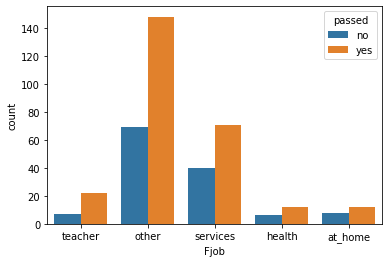

In [42]:
sns.countplot(data= data, x='Fjob', hue= 'passed')

We can combine Mjob and fjob columns as they have same catagories

<AxesSubplot:xlabel='Medu', ylabel='count'>

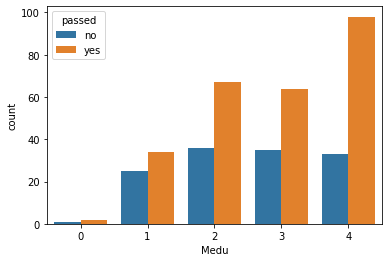

In [56]:
sns.countplot(data= data, x='Medu', hue= 'passed')

<AxesSubplot:xlabel='Fedu', ylabel='count'>

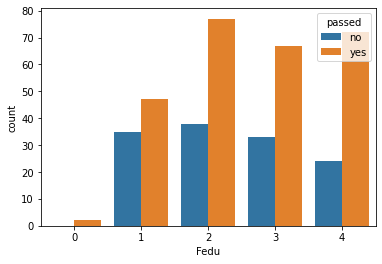

In [57]:
sns.countplot(data= data, x='Fedu', hue= 'passed')

We can combine Fedu and Medu columns as they have same catagories, As the education of parents increased, the possibility of passing the student is also getting high

<AxesSubplot:xlabel='freetime', ylabel='count'>

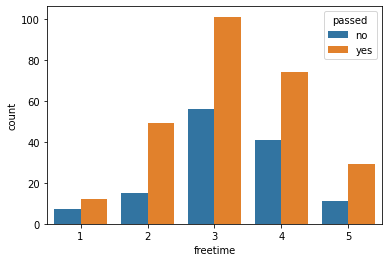

In [43]:
sns.countplot(data= data, x='freetime', hue= 'passed')

<AxesSubplot:xlabel='Parent_Edu', ylabel='count'>

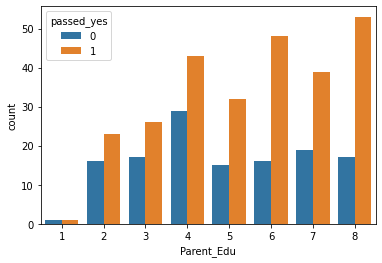

In [62]:
sns.countplot(data= new_data, x='Parent_Edu', hue= 'passed_yes')

<AxesSubplot:xlabel='passed', ylabel='absences'>

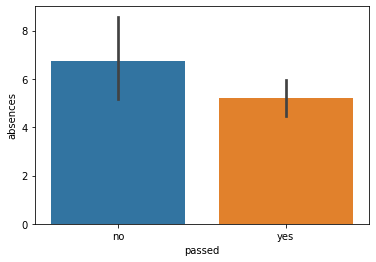

In [49]:
sns.barplot(data= data, x='passed', y= 'absences')

The given data is about the performance of students in exams. There is 31 features in the dataset and some of the features are irrelevent for the model, so that we can drop such columns.
 The students whoes parents doing other job 

### Encoding

In [23]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
a=['Mjob', 'Fjob','passed']
for i in np.arange(len(a)):    
    data[a[i]] = label.fit_transform(data[a[i]])


In [24]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,0,4,...,no,no,4,3,4,1,1,3,6,0
1,GP,F,17,U,GT3,T,1,1,0,2,...,yes,no,5,3,3,1,1,3,4,0
2,GP,F,15,U,LE3,T,1,1,0,2,...,yes,no,4,3,2,2,3,3,10,1
3,GP,F,15,U,GT3,T,4,2,1,3,...,yes,yes,3,2,2,1,1,5,2,1
4,GP,F,16,U,GT3,T,3,3,2,2,...,no,no,4,3,2,1,2,5,4,1


In [25]:
# One hot encoding
new_data = pd.get_dummies(data)

In [27]:
new_data.head()

,age,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,famrel,freetime,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,0,4,2,2,0,4,3,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,0,2,1,2,0,5,3,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,0,2,1,2,3,4,3,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,1,3,0,3,2,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,2,2,1,2,0,4,3,...,1,0,0,1,0,1,1,0,1,0


In [28]:
# combining the data which have same features
new_data['Parent_edu'] = new_data['Medu']+new_data['Fedu']

In [30]:
new_data['Alcahol'] = new_data['Dalc']+new_data['Walc']

In [31]:
new_data['time']=new_data['freetime']+new_data['goout']

In [63]:
new_data=new_data.drop(['Medu','Fedu','Dalc','Walc','freetime','goout'],axis=1)

In [64]:
new_data.head(2)

,Mjob,Fjob,traveltime,studytime,failures,famrel,health,absences,passed,school_MS,...,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,Parent_edu,Alcahol,time
0,0,4,2,2,0,4,3,6,0,0,...,0,0,1,0,1,1,0,8,2,7
1,0,2,1,2,0,5,3,4,0,0,...,0,1,0,0,1,0,1,2,2,6


In [66]:
new_data.columns

Index(['Mjob', 'Fjob', 'traveltime', 'studytime', 'failures', 'famrel',
       'health', 'absences', 'passed', 'school_MS', 'sex_F', 'sex_M',
       'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A',
       'Pstatus_T', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no',
       'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no',
       'internet_yes', 'Parent_edu', 'Alcahol', 'time'],
      dtype='object')

In [65]:
new_data.describe()

,Mjob,Fjob,traveltime,studytime,failures,famrel,health,absences,passed,school_MS,...,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,Parent_edu,Alcahol,time
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,2.169620,2.281013,1.448101,2.035443,0.334177,3.944304,3.554430,5.708861,0.670886,0.116456,...,0.508861,0.205063,0.794937,0.050633,0.949367,0.167089,0.832911,5.270886,3.772152,6.344304
std,1.227473,0.863542,0.697505,0.839240,0.743651,0.896659,1.390303,8.003096,0.470487,0.321177,...,0.500555,0.404260,0.404260,0.219525,0.219525,0.373528,0.373528,1.966738,1.984389,1.694403
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000
25%,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,4.000000,2.000000,5.000000
50%,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,4.000000,4.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,6.000000
75%,3.000000,3.000000,2.000000,2.000000,0.000000,5.000000,5.000000,8.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,7.000000,5.000000,8.000000
max,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,75.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,10.000000,10.000000


In [75]:
# splitting data
X = new_data.drop(['passed'], axis=1)

In [76]:
Y=new_data['passed']

### Building Models

In [67]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state=45,test_size=.20)

In [77]:
# logistic regression
from sklearn.linear_model import LogisticRegression

logit_reg = LogisticRegression()
logit_reg.fit(X_train,Y_train)
Y_pred = logit_reg.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [79]:
print("Accuracy is", accuracy_score(Y_test,Y_pred))
print("Precision is", precision_score(Y_test,Y_pred))
print("Recall is", recall_score(Y_test,Y_pred))
print("Fl score is", f1_score(Y_test,Y_pred))

Accuracy is 0.6329113924050633
Precision is 0.671875
Recall is 0.8431372549019608
Fl score is 0.7478260869565218


In [80]:
confusion_matrix(Y_test,Y_pred)

array([[ 7, 21],
       [ 8, 43]], dtype=int64)

In [81]:
# standardising the data

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [82]:
logit_reg = LogisticRegression()
logit_reg.fit(X_train,Y_train)
Y_pred = logit_reg.predict(X_test)

In [83]:
print("Accuracy is", accuracy_score(Y_test,Y_pred))
print("Precision is", precision_score(Y_test,Y_pred))
print("Recall is", recall_score(Y_test,Y_pred))
print("Fl score is", f1_score(Y_test,Y_pred))

Accuracy is 0.6329113924050633
Precision is 0.671875
Recall is 0.8431372549019608
Fl score is 0.7478260869565218


In [50]:
confusion_matrix(Y_test,Y_pred)

array([[ 7, 21],
       [ 8, 43]], dtype=int64)

corrmatrix= new_data.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmatrix, vmin=-.7,vmax=.7,linewidths=.2,annot=True,cmap='YlGnBu')

In [97]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbours = np.arange(3,15)
for k in neighbours:
    classifier = KNeighborsClassifier(n_neighbors=k, metric ='minkowski' )
    classifier.fit(X_train,Y_train) 
    y_pred= classifier.predict(X_test)
    acc= accuracy_score(Y_test,y_pred)
    acc_values.append(acc)

In [98]:
acc_values

[0.6835443037974683,
 0.6582278481012658,
 0.6835443037974683,
 0.6962025316455697,
 0.7088607594936709,
 0.7215189873417721,
 0.6962025316455697,
 0.6835443037974683,
 0.6835443037974683,
 0.6835443037974683,
 0.6835443037974683,
 0.7088607594936709]

Text(0.5, 0, 'Neighbours')

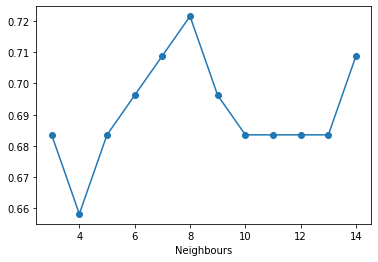

In [99]:
plt.plot(neighbours,acc_values,'o-')
plt.xlabel("Neighbours")

In [100]:

    classifier = KNeighborsClassifier(n_neighbors=8, metric ='minkowski' )
    classifier.fit(X_train,Y_train) 
    y_pred= classifier.predict(X_test)
   

In [101]:
print("Accuracy is", accuracy_score(Y_test,y_pred))
print("Precision is", precision_score(Y_test,y_pred))
print("Recall is", recall_score(Y_test,y_pred))
print("Fl score is", f1_score(Y_test,y_pred))

Accuracy is 0.7215189873417721
Precision is 0.7543859649122807
Recall is 0.8431372549019608
Fl score is 0.7962962962962964


In [108]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [109]:
y_p = dt_model.predict(X_test)

In [110]:
print("Accuracy is", accuracy_score(Y_test,y_pred))
print("Precision is", precision_score(Y_test,y_pred))
print("Recall is", recall_score(Y_test,y_pred))
print("Fl score is", f1_score(Y_test,y_pred))

Accuracy is 0.7215189873417721
Precision is 0.7543859649122807
Recall is 0.8431372549019608
Fl score is 0.7962962962962964
